In [183]:
from collections import Counter

In [5]:
from ticker_monitor.common.db import db

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [231]:
import yfinance as yf

## Ingest Data

### Comments Data

In [53]:
comments = list(db['comment'].find({}))

In [72]:
df_comments = pd.DataFrame(comments)

In [73]:
df_comments = (df_comments
               .set_index('comment_id')
               .drop(columns=['_id', 'submission_id']))

In [75]:
df_comments['time'] = pd.to_datetime(df_comments['created_utc'], unit='s')

In [76]:
df_comments = (df_comments
               .drop(columns=['created_utc']))

In [77]:
df_comments

,depth,score,time
comment_id,,,
hbnbwob,0,7,2021-09-05 03:32:48
hbnbxo6,0,7,2021-09-05 03:33:04
hbnbtuw,0,6,2021-09-05 03:32:04
hbnbxg3,1,4,2021-09-05 03:33:00
hbnby3u,0,3,2021-09-05 03:33:11
...,...,...,...
hdf3don,0,2,2021-09-19 03:22:25
hdf3d9f,0,1,2021-09-19 03:22:20
hdf3fcn,0,1,2021-09-19 03:22:47


### Feature Data

In [155]:
counter_decoder = db['featurizers'].find_one({'name': 'counter'})

In [156]:
feature_names = counter_decoder['vector']

In [34]:
features = list(db['feature'].find({}))

In [46]:
df_features = pd.DataFrame(features)

In [47]:
df_features = (df_features
               .set_index(['comment_id', 'name'])
               .drop(columns=['_id', 'version']))

In [160]:
df_features['vector'] = [np.array(x) for x in df_features['vector']]

In [159]:
df_features.columns = df_features.columns + feature_names

ValueError: Length of values (147) does not match length of index (1)

In [ ]:
for index, name in enumerate(features_names):
    

In [161]:
df_features

,,vector
comment_id,name,
hbnbwob,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
hbnbxo6,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
hbnbtuw,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
hbnbxg3,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
hbnby3u,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
hdf3don,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
hdf3d9f,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
hdf3fcn,counter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Prepare Data

In [149]:
df = pd.merge(left=df_comments, right=df_features, on='comment_id')

In [85]:
start_period = df['time'].min()

In [84]:
end_period = df['time'].max()

In [87]:
pd.date_range(start=start_period, end=end_period, freq='H')

DatetimeIndex(['2021-09-05 03:32:04', '2021-09-05 04:32:04',
               '2021-09-05 05:32:04', '2021-09-05 06:32:04',
               '2021-09-05 07:32:04', '2021-09-05 08:32:04',
               '2021-09-05 09:32:04', '2021-09-05 10:32:04',
               '2021-09-05 11:32:04', '2021-09-05 12:32:04',
               ...
               '2021-09-18 21:32:04', '2021-09-18 22:32:04',
               '2021-09-18 23:32:04', '2021-09-19 00:32:04',
               '2021-09-19 01:32:04', '2021-09-19 02:32:04',
               '2021-09-19 03:32:04', '2021-09-19 04:32:04',
               '2021-09-19 05:32:04', '2021-09-19 06:32:04'],
              dtype='datetime64[ns]', length=340, freq='H')

In [142]:
def el_add(x):
    return [x_i + y_i for x_i, y_i in zip(x[0], x[1])]

In [129]:
len(df['vector'][0])

147

In [173]:
df_agg = df.groupby(pd.Grouper(key='time', freq='H')).agg(
    ('vector', lambda x: np.sum(np.vstack(x), axis=0, ))

SyntaxError: unexpected EOF while parsing (2320225461.py, line 2)

In [170]:
all([len(v) == 147 for v in df_agg['vector']])

True

In [177]:
df_agg

,vector
time,
2021-09-05 03:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2021-09-05 04:00:00,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2021-09-05 05:00:00,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2021-09-05 06:00:00,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
2021-09-05 07:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ..."
...,...
2021-09-19 03:00:00,"[2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 4, 1, ..."
2021-09-19 04:00:00,"[2, 0, 0, 4, 0, 3, 0, 1, 0, 0, 0, 0, 1, 2, 1, ..."
2021-09-19 05:00:00,"[2, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [188]:
np.argsort([0, 1, 4, 3])

array([0, 1, 3, 2])

In [202]:
l = []

for v in df_agg['vector']:
    
    l.extend([i for i in np.argsort(v) if v[i]])

In [203]:
Counter(l).most_common()

[(121, 341),
 (23, 341),
 (134, 340),
 (75, 337),
 (40, 337),
 (74, 336),
 (34, 336),
 (118, 326),
 (133, 325),
 (136, 316),
 (35, 314),
 (87, 311),
 (3, 311),
 (53, 308),
 (5, 307),
 (4, 298),
 (115, 295),
 (95, 293),
 (13, 284),
 (125, 283),
 (1, 282),
 (37, 279),
 (0, 277),
 (44, 275),
 (101, 268),
 (107, 267),
 (14, 260),
 (131, 252),
 (7, 231),
 (36, 229),
 (84, 228),
 (137, 221),
 (43, 220),
 (31, 220),
 (144, 206),
 (56, 179),
 (17, 177),
 (66, 171),
 (112, 162),
 (2, 156),
 (6, 153),
 (59, 139),
 (90, 135),
 (41, 133),
 (28, 129),
 (127, 129),
 (85, 126),
 (135, 121),
 (122, 118),
 (33, 109),
 (19, 104),
 (143, 88),
 (96, 88),
 (100, 85),
 (32, 85),
 (69, 85),
 (98, 84),
 (15, 76),
 (12, 73),
 (11, 69),
 (123, 66),
 (22, 64),
 (89, 62),
 (110, 61),
 (102, 58),
 (16, 55),
 (25, 54),
 (113, 53),
 (29, 48),
 (10, 47),
 (21, 43),
 (49, 41),
 (50, 41),
 (27, 41),
 (111, 39),
 (45, 33),
 (18, 33),
 (46, 32),
 (92, 31),
 (117, 29),
 (24, 25),
 (9, 23),
 (8, 20),
 (58, 18),
 (71, 15),


In [204]:
for i, count in Counter(l).most_common():
    print(feature_names[i], count)

se 341
you 341
ed 340
ual 337
now 337
gain 336
z 336
ths 326
tan 325
fri 316
gm 314
run 311
gme 311
wen 308
wish 307
spy 298
ater 295
aso 293
bb 284
ken 283
clov 282
expi 279
amc 277
net 275
nue 268
penn 267
hood 260
zy 252
fas 231
coin 229
rsi 228
epi 221
reed 220
nio 220
skin 206
stem 179
tsla 177
hut 171
team 162
baba 156
pltr 153
astr 139
sdc 135
box 133
hd 129
aapl 129
shop 126
kar 121
dds 118
amd 109
sofi 104
root 88
mvis 88
mt 85
amat 85
rkt 85
hims 84
geo 76
msft 73
crsr 69
uwmc 66
amzn 64
upst 62
mcd 61
exas 58
clne 55
nvda 54
spce 53
sprt 48
mvst 47
clf 43
edr 41
zim 41
tlry 41
cano 39
psfe 33
mrna 33
sndl 32
wkhs 31
ocgn 29
ddd 25
pfe 23
sklz 20
aal 18
paya 15
bark 13
sqqq 13
qd 12
nflx 12
lumn 12
woof 10
viac 9
lvs 9
arkk 8
lazr 8
rblx 7
bidu 7
maps 7
ptra 7
chpt 7
znga 7
mstr 6
chwy 6
xela 6
fsr 6
pins 6
tgt 6
nakd 5
tigr 5
lmnd 5
finv 5
maxr 4
swbi 4
wmt 4
otly 4
bitf 3
vsto 3
arvl 3
avpt 3
goco 3
gotu 2
blnd 2
sesn 2
cgc 2
cme 2
wisa 1
amrn 1
eglx 1
docn 1
clsk 1
hcmc 1


### Results

In [244]:
tickers = ('gme', 'amc', 'clov', 'spy', 'mvis', 'tsla')

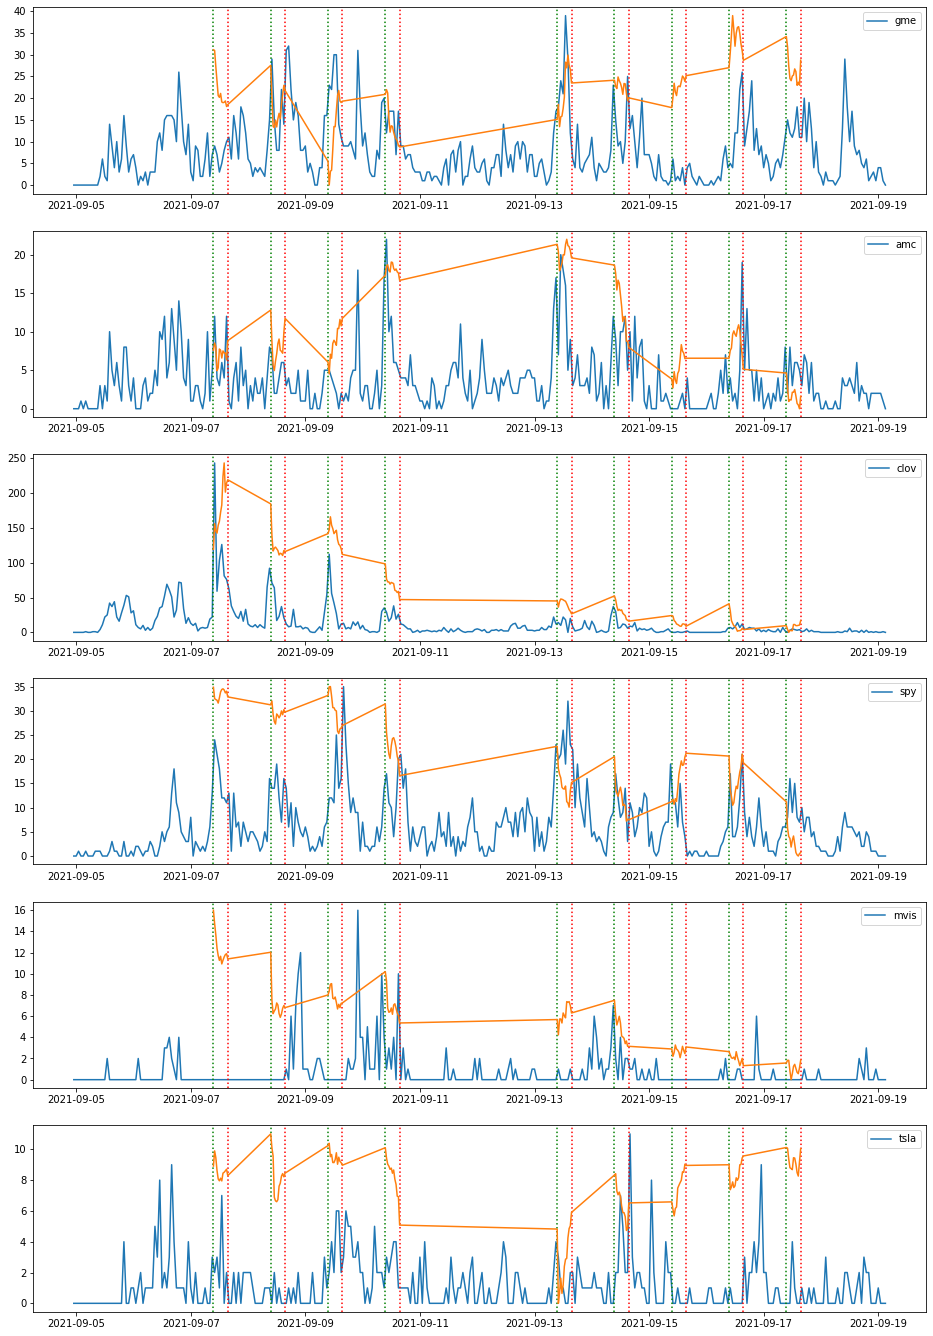

In [266]:
fig = plt.figure(figsize=(16, 24))
axs = fig.subplots(nrows=len(tickers))

for ax, ticker_name in zip(axs, tickers):
    ticker_idx = [idx for idx, t in enumerate(feature_names) if t == ticker_name]
    frequencies = [v[ticker_idx] for v in df_agg['vector']]
    ax.plot(df_agg.index, frequencies, label=ticker_name)
    ticker_yf = yf.Ticker(ticker_name)
    ticker_h = ticker_yf.history(start=start_period, end=end_period, interval='30m')
    
    s = (ticker_h['High'] - ticker_h['High'].min()) / (ticker_h['High'].max() - ticker_h['High'].min())
    
    for t in ticker_h.index:
        if t.hour == 9 and t.minute==30:
            ax.axvline(t, color='g', ls=":")
        if t.hour == 15 and t.minute==30:
            ax.axvline(t, color='r', ls=":")
    
    ax.plot(ticker_h.index, max(frequencies)*s)
    ax.legend(loc='upper right')
